### 라이브러리 임포트

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage
import random

### 함수 정의

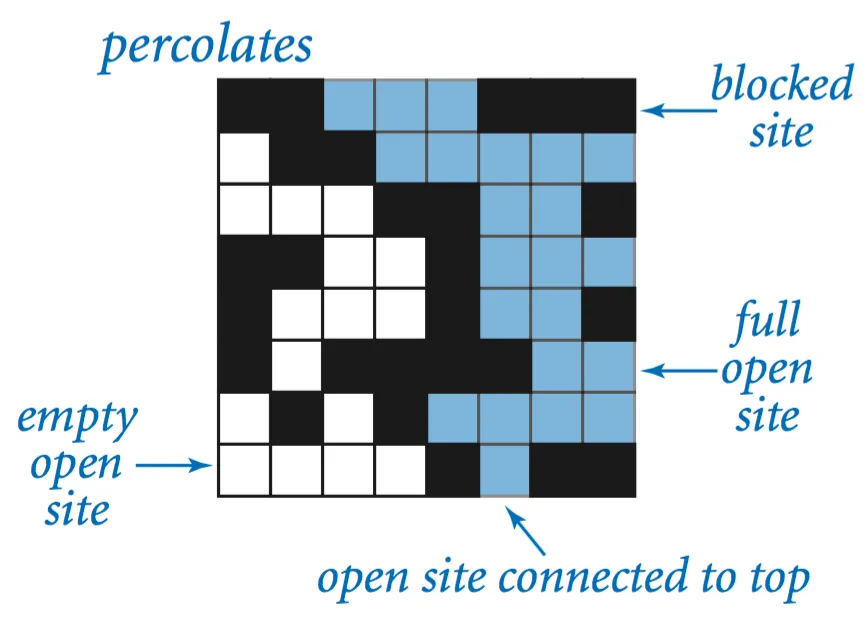

In [62]:
# 루트를 찾는 함수
def find(ptr, x):
    if ptr[x] < 0:
        return x
    else:
        ptr[x] = find(ptr, ptr[x]) # 경로 압축
        return ptr[x]

In [63]:
# 두 집합을 합치는 함수
def union(ptr, size, x, y):
    rootX = find(ptr, x)
    rootY = find(ptr, y)

    if rootX != rootY:
        if ptr[rootX] < ptr[rootY]:  # x의 규모가 더 클 때
            ptr[rootX] += ptr[rootY]
            ptr[rootY] = rootX
            size[rootX] += size[rootY]
        else:
            ptr[rootY] += ptr[rootX]
            ptr[rootX] = rootY
            size[rootY] += size[rootX]

In [64]:
# 4N/2 = 2N 개의 bond이므로 right, down 두 가지 방향으로 찾아본다
def bonds(L):
    bond_list = []
    for i in range(L):
        for j in range(L):
            node = i * L + j

            right = i * L + (j + 1) % L
            bond_list.append((node, right)) # 해당 노드와 우측 노드 사이 bond

            down = ((i + 1) % L) * L + j
            bond_list.append((node, down)) # 해당 노드와 하측 노드 사이 bond
    return bond_list

In [65]:
'''
def bond_percolation(L, p):
    N = L * L
    ptr = [-1] * N # root 초기화
    size = [1] * N # size 초기화

    bond_list = bonds(L)
    random.shuffle(bond_list) # bond 순서 무작위로
    num_bonds = int(p * len(bond_list)) # 확률 p에 따라 활성화할 bond 수 계산

    for i in range(num_bonds): # 계산된 수만큼 무작위 순서의 bond를 읽고
        node1, node2 = bond_list[i] # 해당 bond로 연결된 두 노드를 확인
        union(ptr, size, node1, node2) # union으로 병합

    # 윗줄과 아랫줄이 연결되어 있는지 확인(퍼콜레이션 확인)
    top_row = {find(ptr, i) for i in range(L)}
    bottom_row = {find(ptr, N - 1 - i) for i in range(L)}
    if top_row & bottom_row: # 두 줄 사이 교집합이 있다면 성공
        return max(size)/N # giant cluster size ratio
    return False
'''

'\ndef bond_percolation(L, p):\n    N = L * L\n    ptr = [-1] * N # root 초기화\n    size = [1] * N # size 초기화\n\n    bond_list = bonds(L) \n    random.shuffle(bond_list) # bond 순서 무작위로\n    num_bonds = int(p * len(bond_list)) # 확률 p에 따라 활성화할 bond 수 계산\n\n    for i in range(num_bonds): # 계산된 수만큼 무작위 순서의 bond를 읽고\n        node1, node2 = bond_list[i] # 해당 bond로 연결된 두 노드를 확인\n        union(ptr, size, node1, node2) # union으로 병합\n\n    # 윗줄과 아랫줄이 연결되어 있는지 확인(퍼콜레이션 확인)\n    top_row = {find(ptr, i) for i in range(L)}\n    bottom_row = {find(ptr, N - 1 - i) for i in range(L)}\n    if top_row & bottom_row: # 두 줄 사이 교집합이 있다면 성공\n        return max(size)/N # giant cluster size ratio\n    return False\n'

In [66]:
def bond_percolation(L):
    N = L * L
    ptr = [-1] * N  # root 초기화
    size = [1] * N  # size 초기화
    G_list = []
    P_list = []

    bond_list = bonds(L)
    random.shuffle(bond_list)  # bond 순서 무작위로

    for i in range(len(bond_list)):  # 무작위 순서의 bond를 읽고
        P_list.append((i+1)/(2*N))
        node1, node2 = bond_list[i]  # 해당 bond로 연결된 두 노드를 확인
        union(ptr, size, node1, node2)  # union으로 병합

        # 현재 단계의 giant cluster size ratio를 계산
        G_list.append(max(size) / N)

    # 윗줄과 아랫줄이 연결되어 있는지 확인(퍼콜레이션 확인)
    top_row = {find(ptr, i) for i in range(L)}
    bottom_row = {find(ptr, N - 1 - i) for i in range(L)}
    if top_row & bottom_row:  # 두 줄 사이 교집합이 있다면 성공
        return P_list, G_list  # giant cluster size ratio

    return P_list, G_list  # 만약 퍼콜레이션이 발생하지 않더라도 전체 리스트 반환

### 실행!

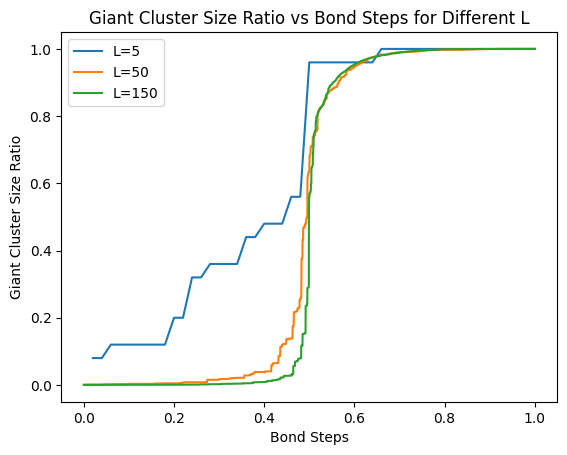

In [68]:
P5, G5 = bond_percolation(5)
P50, G50 = bond_percolation(50)
P150, G150 = bond_percolation(150)
# G256 = bond_percolation(256)

plt.plot(P5, G5, label='L=5')
plt.plot(P50, G50, label='L=50')
plt.plot(P150, G150, label='L=150')
# plt.plot(G256, label='L=256')

plt.xlabel('Bond Steps')
plt.ylabel('Giant Cluster Size Ratio')
plt.title('Giant Cluster Size Ratio vs Bond Steps for Different L')

plt.legend()
plt.show()